# 📈 Monthly Price Forecasting – Business Case Solution

## Business Context
This case focuses on forecasting average monthly prices for the next 12 months using historical price data. The objective is to support business decision-making such as pricing strategy, budgeting, and procurement planning.

## Data Dictionary & Source Acquisition
- Dataset contains historical average monthly prices
- Frequency: Monthly
- Source: Provided CSV file

The data was reviewed for structure, completeness, and suitability for time-series analysis.

In [153]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [154]:
df = pd.read_csv('price_data.csv')
df.head()

,date,avg_monthly_price
0,2005-01-01,5500
1,2005-02-01,5476
2,2005-03-01,5466
3,2005-04-01,5487
4,2005-05-01,5876


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               249 non-null    object
 1   avg_monthly_price  249 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


## Data Cleaning and Preprocessing
- Converted date column to datetime format
- Sorted data chronologically
- Verified missing values and duplicates (none found)
- Retained genuine price spikes as they represent real market behavior

In [156]:
df['date'] = pd.to_datetime(df['date'])
df


,date,avg_monthly_price
0,2005-01-01,5500
1,2005-02-01,5476
2,2005-03-01,5466
3,2005-04-01,5487
4,2005-05-01,5876
...,...,...
244,2025-05-01,14263
245,2025-06-01,14263
246,2025-07-01,16000
247,2025-08-01,15025


In [157]:
df = df.rename(columns={'date':'x','avg_monthly_price':'y'})
df

,x,y
0,2005-01-01,5500
1,2005-02-01,5476
2,2005-03-01,5466
3,2005-04-01,5487
4,2005-05-01,5876
...,...,...
244,2025-05-01,14263
245,2025-06-01,14263
246,2025-07-01,16000
247,2025-08-01,15025


In [158]:
df = df.sort_values(by='x')
df

,x,y
0,2005-01-01,5500
1,2005-02-01,5476
2,2005-03-01,5466
3,2005-04-01,5487
4,2005-05-01,5876
...,...,...
244,2025-05-01,14263
245,2025-06-01,14263
246,2025-07-01,16000
247,2025-08-01,15025


In [159]:
df.isnull().sum()

x    0
y    0
dtype: int64

## Exploratory Data Analysis (EDA)
Exploratory analysis was conducted to understand trend, variability, and seasonal behavior in the price data.

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

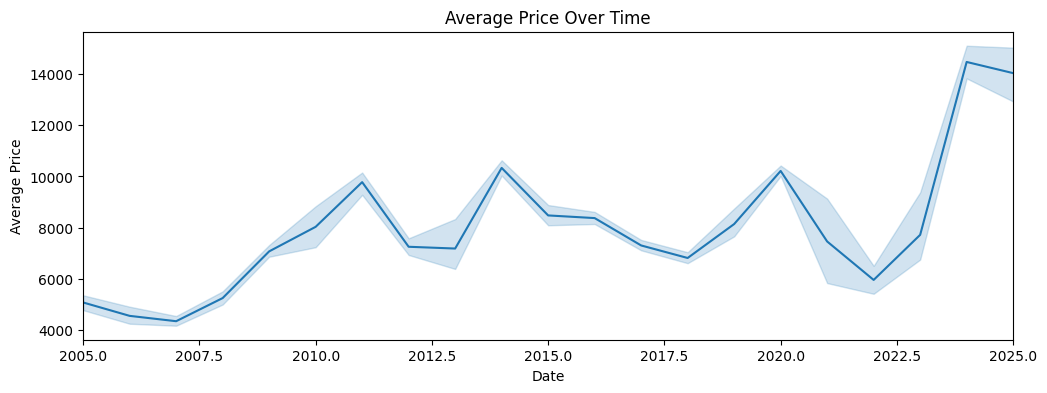

In [161]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(data=df, x=df['x'].dt.year, y='y')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
ax.set_xlim(df['x'].dt.year.min(), df['x'].dt.year.max())
plt.show()


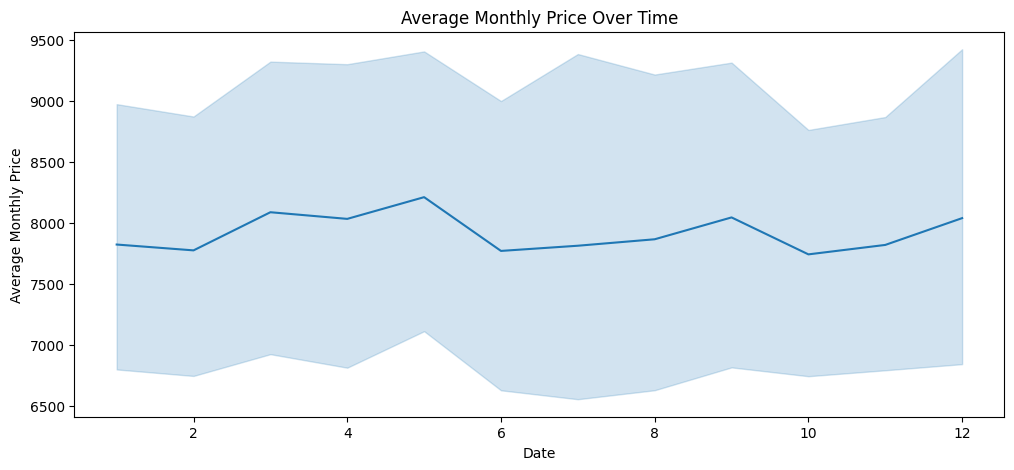

In [162]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x=df['x'].dt.month, y='y')
plt.title('Average Monthly Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Monthly Price')
plt.show()

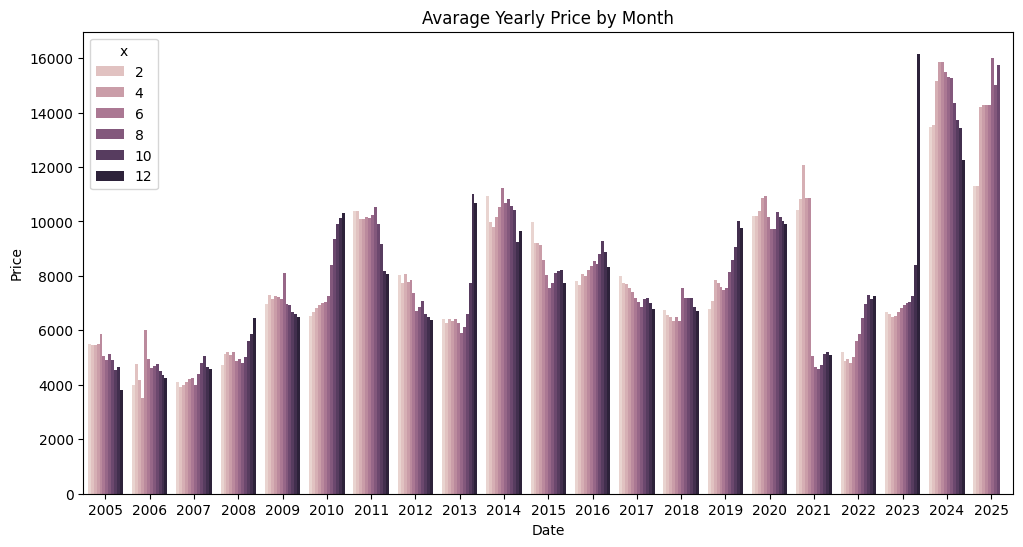

In [163]:
plt.figure(figsize=(12,6))
sns.barplot(df, x=df['x'].dt.year, y='y', hue=df['x'].dt.month)
plt.title("Avarage Yearly Price by Month")
plt.xlabel("Date")
plt.ylabel("Price")

plt.show()

### Key Observations from EDA
1. **Trend Dominance**: The series exhibits a strong long-term upward trend with noticeable structural shifts approximately every 3–4 years.
2. **Weak Seasonality**: Monthly patterns do not show a stable or repeating seasonal structure.
3. **Non-Stationarity**: The original time series is non-stationary due to trend effects.

These observations guide the model selection process.

## Stationarity Analysis
Since ARIMA models require stationary data, stationarity was assessed using the Augmented Dickey-Fuller (ADF) test. First-order differencing was applied to remove trend and achieve stationarity.

In [164]:
from statsmodels.tsa.stattools import adfuller

In [165]:

def adf_test(series):
    result = adfuller(series)
    print(f"p-value: {result[1]}")
    return result


In [166]:
result = adf_test(df['y'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

p-value: 0.4669317756613447
ADF Statistic: -1.631067910499217
p-value: 0.4669317756613447


**Stationarity test results:**
- Augmented Dickey-Fuller Test Statistic: -1.63
- p-value: 0.46

**Conclusion:** The p-value is greater than 0.05, indicating that the time series
is non-stationary and requires differencing.

## Model Comparison and Evaluation
Multiple models were evaluated based on their forecasting accuracy using RMSE, MAE, and MAPE metrics.


In [167]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score

#### 1. ARIMA Model

In [168]:
from statsmodels.tsa.arima.model import ARIMA

In [169]:
train = df[:-12]
test = df[-12:]

In [170]:
arima = ARIMA(train['y'], order=(5,1,2))
arima_fit = arima.fit()
y_pred = arima_fit.forecast(steps=12)
y_pred = round(y_pred)

In [171]:
y_pred

237    14463.0
238    14845.0
239    15016.0
240    14806.0
241    14492.0
242    14470.0
243    14747.0
244    14958.0
245    14846.0
246    14574.0
247    14490.0
248    14684.0
Name: predicted_mean, dtype: float64

In [172]:
mae = mean_absolute_error(test['y'], y_pred)
mse = mean_squared_error(test.y, y_pred)
rmse = root_mean_squared_error(test.y, y_pred)
mape = mean_absolute_percentage_error(test.y, y_pred)*100


print(f'Mean Squared Error: {round(mse,2)}')
print(f'Mean Absolute Error: {round(mae,2)}')
print(f'Root Mean Squared Error: {round(rmse,2)}')
print(f'Mean Absolute Percentage Error: {round(mape,2)}%')
# r2_score(test['y'], y_pred)



Mean Squared Error: 3087989.25
Mean Absolute Error: 1386.75
Root Mean Squared Error: 1757.27
Mean Absolute Percentage Error: 10.91%


#### 2. SARIMAX Model

In [173]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [174]:
sarimax = SARIMAX(train['y'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarimax_fit = sarimax.fit()
sarimax_forecast = sarimax_fit.forecast(steps=12)
sarimax_forecast = round(sarimax_forecast)
sarimax_forecast

237    14728.0
238    14734.0
239    15745.0
240    15337.0
241    15403.0
242    15681.0
243    15751.0
244    15732.0
245    15169.0
246    15053.0
247    15246.0
248    15286.0
Name: predicted_mean, dtype: float64

In [175]:

mae = mean_absolute_error(test['y'], sarimax_forecast)
mse = mean_squared_error(test.y, sarimax_forecast)
rmse = root_mean_squared_error(test.y, sarimax_forecast)
mape = mean_absolute_percentage_error(test.y, sarimax_forecast)*100

print(f'Mean Squared Error: {round(mse,2)}')
print(f'Mean Absolute Error: {round(mae,2)}')
print(f'Root Mean Squared Error: {round(rmse,2)}')
print(f'Mean Absolute Percentage Error: {round(mape,2)}%')



Mean Squared Error: 4698196.08
Mean Absolute Error: 1740.25
Root Mean Squared Error: 2167.53
Mean Absolute Percentage Error: 13.75%


#### 3. Prophet Model

In [176]:
from prophet import Prophet

In [177]:
train = train.rename(columns={'x':'ds'})
test = test.rename(columns={'x':'ds'})

In [178]:
prophet_model = Prophet()
prophet_model.fit(train)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
future_pred = prophet_model.predict(future)

11:05:57 - cmdstanpy - INFO - Chain [1] start processing
11:05:57 - cmdstanpy - INFO - Chain [1] done processing


In [179]:
y_pred = future_pred[-12:].yhat
y_pred = round(y_pred)
y_pred

237    9173.0
238    9245.0
239    9571.0
240    9529.0
241    9507.0
242    9587.0
243    9552.0
244    9747.0
245    9313.0
246    9263.0
247    9357.0
248    9466.0
Name: yhat, dtype: float64

In [180]:
mae = mean_absolute_error(test['y'], y_pred)
mse = mean_squared_error(test.y, y_pred)
rmse = root_mean_squared_error(test.y, y_pred)
mape = mean_absolute_percentage_error(test.y, y_pred)*100
print(f'Mean Squared Error: {round(mse,2)}')
print(f'Mean Absolute Error: {round(mae,2)}')
print(f'Root Mean Squared Error: {round(rmse,2)}')
print(f'Mean Absolute Percentage Error: {round(mape,2)}%')
# r2_score(test['y'], y_pred)

Mean Squared Error: 21441944.5
Mean Absolute Error: 4374.5
Root Mean Squared Error: 4630.54
Mean Absolute Percentage Error: 30.8%


## Model Description and Selection

A non-seasonal ARIMA (AutoRegressive Integrated Moving Average) model was selected
for forecasting average monthly prices.

### Reasons for Selecting ARIMA:

- The data exhibits a strong long-term trend
- No strong or consistent seasonal pattern was observed in monthly or yearly analysis
- The series becomes stationary after first-order differencing
- ARIMA is well-suited for trend-driven, non-seasonal time series
- The model is interpretable and widely used in economic and price forecasting

Alternative models such as SARIMAX and Prophet were considered; however, weak seasonal
evidence and better evaluation performance led to the selection of ARIMA.
The final ARIMA model configuration chosen is (5,1,2):
- p=5 (number of autoregressive terms)
- d=1 (first-order differencing to achieve stationarity)
- q=2 (number of moving average terms)



## Future Forecasts on ARIMA Model
The ARIMA(5,1,2) model was trained on the full dataset to generate forecasts for the next 12 months.



In [181]:
arima = ARIMA(df.y, order=(5,1,2))
model = arima.fit()
model_pred = model.forecast(steps=12)
model_pred = round(model_pred)
model_pred


249    15920.0
250    16431.0
251    16121.0
252    15753.0
253    16009.0
254    16371.0
255    16100.0
256    15761.0
257    16036.0
258    16356.0
259    16077.0
260    15776.0
Name: predicted_mean, dtype: float64

In [182]:
future_dates = pd.date_range(start=df['x'].max() + pd.DateOffset(months=1), periods=12, freq='M')

In [183]:
predicted = pd.DataFrame({'date':future_dates,'price':model_pred.values})
predicted

,date,price
0,2025-10-31,15920.0
1,2025-11-30,16431.0
2,2025-12-31,16121.0
3,2026-01-31,15753.0
4,2026-02-28,16009.0
5,2026-03-31,16371.0
6,2026-04-30,16100.0
7,2026-05-31,15761.0
8,2026-06-30,16036.0
9,2026-07-31,16356.0


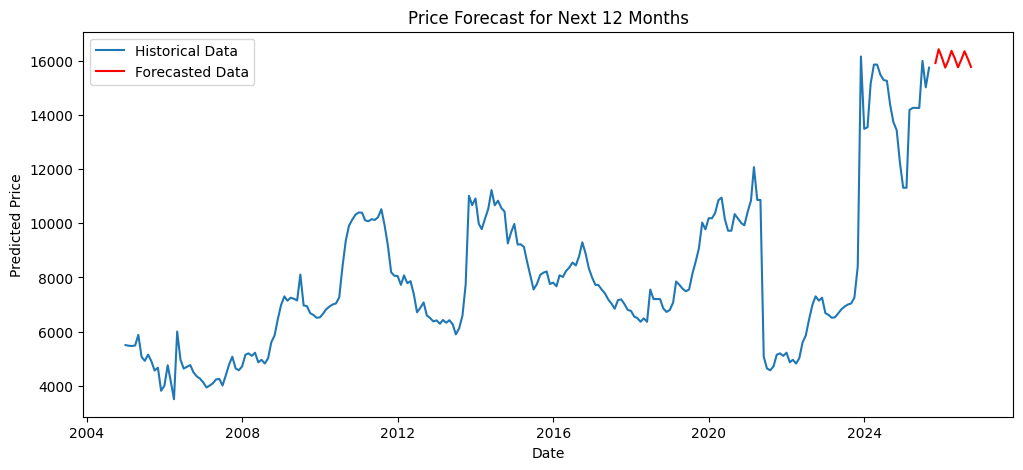

In [184]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x=df['x'], y='y', label='Historical Data')
plt.plot(future_dates, model_pred, color='red', label='Forecasted Data')
plt.title('Price Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

## Business Actions Based on Forecasted Prices

Based on the predicted monthly price trends, a company can take the following actions:

- Adjust procurement strategies to purchase during expected low-price periods
- Revise pricing strategies to protect profit margins during rising price trends
- Improve budgeting and financial planning using forward-looking price estimates
- Optimize inventory management based on anticipated price fluctuations


## Measuring Effectiveness of Business Actions

The effectiveness of implemented actions can be evaluated by:

- Comparing actual prices with forecasted prices over time
- Monitoring changes in profit margins and procurement costs
- Evaluating inventory holding costs before and after implementation
- Tracking forecast accuracy metrics (MAE, RMSE) on new data
- Assessing financial KPIs such as cost savings and revenue stability


## Model Deployment Using Django

The trained ARIMA model can be deployed using Django by:

1. Training the model offline and saving it using pickle or joblib
2. Creating a Django backend service
3. Loading the saved model during application startup
4. Exposing prediction functionality through Django views or REST APIs
5. Returning forecast results in JSON or HTML format


## Django Web Application Integration

The ARIMA model can be integrated into a Django-based web application by:

- Creating a dedicated Django app for forecasting
- Accepting user inputs such as forecast horizon
- Generating predictions dynamically using the trained model
- Displaying results via dashboards, charts, or downloadable reports
- Supporting real-time or on-demand price forecasts for business users


## Model Monitoring and Maintenance

Once deployed, the model should be monitored to ensure continued performance:

- Track forecast accuracy metrics over time
- Monitor for data drift or structural changes in price behavior
- Set alert thresholds for significant forecast deviations
- Periodically retrain the model using recent data
- Maintain logs of predictions and actual values for audit and analysis
